In [3]:
import torchattacks
from torchvision import transforms, models, datasets
import torch
from utils_jnb import *
import torchvision
torch.cuda.empty_cache()
set_global_seed()


In [ ]:
#predict_image('src_model_21.pt','examples')

In [4]:
try:
    saved_model = torch.load('src_model_21.pt')
except:
    saved_model = torch.load('src_model_21.pt',map_location=torch.device('cpu'))

In [5]:

_, attackloader, _,_ , attack_length, _ = getData() #this returns 4 for test
with torch.no_grad():
    for j, (inputs, labels) in enumerate(attackloader):
            inputs = inputs.to(device)
            labels = labels.to(device)
    
        

[4996, 556]
5552


tensor([[[-0.4226, -0.7308, -1.5014,  ...,  0.1426,  0.1426,  0.1254],
         [-0.5424, -0.5596, -1.1075,  ...,  0.2967,  0.2453,  0.1939],
         [-0.6623, -0.5767, -0.6623,  ...,  0.3309,  0.3309,  0.2624],
         ...,
         [-0.8678, -0.6965, -0.8335,  ..., -0.6281, -0.5253, -0.5253],
         [-0.8849, -1.0733, -1.1932,  ..., -0.7479, -0.7822, -0.7822],
         [-0.9705, -0.9363, -0.7479,  ..., -0.9363, -1.0048, -0.9705]],

        [[-0.0049, -0.3550, -1.2304,  ...,  0.0126,  0.0126, -0.0049],
         [-0.0399, -0.1099, -0.7402,  ...,  0.1527,  0.1001,  0.0651],
         [-0.1450, -0.1099, -0.2675,  ...,  0.1702,  0.1702,  0.1176],
         ...,
         [-0.7227, -0.5126, -0.5826,  ..., -0.3025, -0.1975, -0.2150],
         [-0.7227, -0.8803, -0.9503,  ..., -0.4076, -0.4426, -0.4776],
         [-0.7402, -0.6877, -0.4601,  ..., -0.6352, -0.6877, -0.6877]],

        [[-0.4450, -0.7413, -1.4907,  ..., -0.3753, -0.4275, -0.4624],
         [-0.6018, -0.6018, -1.1073,  ..., -0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Class probability: tensor(1., device='cuda:0')


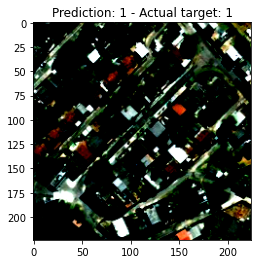

In [6]:
idx=3
with torch.no_grad():
    
    image=inputs[idx]
    #inputs, labels = inputs.cuda(), labels.cuda() 
    #image=image.cpu()
    
    # Generate prediction
    prediction = saved_model(image.unsqueeze(0))

    # Predicted class value using argmax
    predicted_class = np.argmax(prediction.cpu())
    print("Class probability: " +str(torch.max(nnf.softmax(prediction, dim=1))))

    # Reshape image

    image=image.cpu()
    image=image.swapaxes(0,1)
    image=image.swapaxes(1,2)

    # Show result
    plt.imshow(image.cpu(), cmap='Spectral')
    plt.title(f'Prediction: {predicted_class} - Actual target: '+str(labels[idx].detach().cpu().numpy()))
    plt.show()



In [11]:
image=inputs[idx]
image

tensor([[[-0.4226, -0.7308, -1.5014,  ...,  0.1426,  0.1426,  0.1254],
         [-0.5424, -0.5596, -1.1075,  ...,  0.2967,  0.2453,  0.1939],
         [-0.6623, -0.5767, -0.6623,  ...,  0.3309,  0.3309,  0.2624],
         ...,
         [-0.8678, -0.6965, -0.8335,  ..., -0.6281, -0.5253, -0.5253],
         [-0.8849, -1.0733, -1.1932,  ..., -0.7479, -0.7822, -0.7822],
         [-0.9705, -0.9363, -0.7479,  ..., -0.9363, -1.0048, -0.9705]],

        [[-0.0049, -0.3550, -1.2304,  ...,  0.0126,  0.0126, -0.0049],
         [-0.0399, -0.1099, -0.7402,  ...,  0.1527,  0.1001,  0.0651],
         [-0.1450, -0.1099, -0.2675,  ...,  0.1702,  0.1702,  0.1176],
         ...,
         [-0.7227, -0.5126, -0.5826,  ..., -0.3025, -0.1975, -0.2150],
         [-0.7227, -0.8803, -0.9503,  ..., -0.4076, -0.4426, -0.4776],
         [-0.7402, -0.6877, -0.4601,  ..., -0.6352, -0.6877, -0.6877]],

        [[-0.4450, -0.7413, -1.4907,  ..., -0.3753, -0.4275, -0.4624],
         [-0.6018, -0.6018, -1.1073,  ..., -0

In [29]:
torch.max(image)

tensor(2.2043)

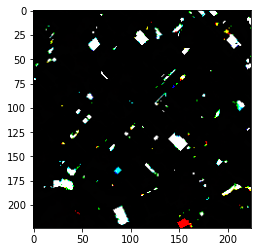

In [17]:
plt.imshow(image.cpu().numpy().astype(np.uint8)*255, cmap='Spectral')

Class probability: tensor(1., device='cuda:0')


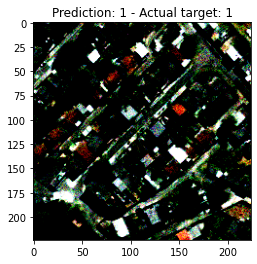

In [7]:
atk = torchattacks.PGD(model=saved_model, eps=0.3, alpha=2/255, steps=40, random_start=True)
adv_example=atk(inputs, labels)[idx]
with torch.no_grad():

    prediction = saved_model(adv_example.unsqueeze(0))

    predicted_class = np.argmax(prediction.cpu())
    print("Class probability: " +str(torch.max(nnf.softmax(prediction, dim=1))))

    # Reshape image

    adv_example=adv_example.cpu()
    adv_example=adv_example.swapaxes(0,1)
    adv_example=adv_example.swapaxes(1,2)

    # Show result
    plt.imshow(adv_example.cpu(), cmap='nipy_spectral')
    plt.title(f'Prediction: {predicted_class} - Actual target: '+str(labels[idx].detach().cpu().numpy()))
    plt.show()

Class probability: tensor(1., device='cuda:0')


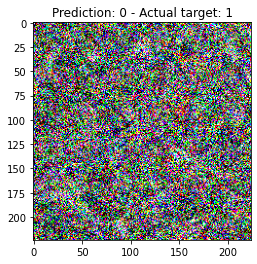

In [31]:
atk = torchattacks.PGD(model=saved_model, eps=5, alpha=2/255, steps=40, random_start=True)
adv_example=atk(inputs, labels)[idx]
with torch.no_grad():

    prediction = saved_model(adv_example.unsqueeze(0))

    predicted_class = np.argmax(prediction.cpu())
    print("Class probability: " +str(torch.max(nnf.softmax(prediction, dim=1))))

    # Reshape image

    adv_example=adv_example.cpu()
    adv_example=adv_example.swapaxes(0,1)
    adv_example=adv_example.swapaxes(1,2)

    # Show result
    plt.imshow(adv_example.cpu(), cmap='nipy_spectral')
    plt.title(f'Prediction: {predicted_class} - Actual target: '+str(labels[idx].detach().cpu().numpy()))
    plt.show()

In [27]:
torch.mean(torch.abs(adv_example_eps1-adv_example_eps2))

tensor(0.2767)

Class probability: tensor(1., device='cuda:0')


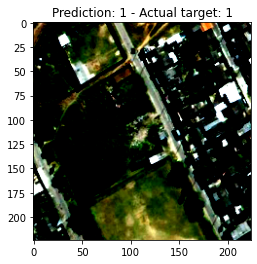

In [7]:
atk = torchattacks.FGSM(saved_model, eps=.007)
adv_example=atk(inputs, labels)[idx]
with torch.no_grad():

    prediction = saved_model(adv_example.unsqueeze(0))

    predicted_class = np.argmax(prediction.cpu())
    print("Class probability: " +str(torch.max(nnf.softmax(prediction, dim=1))))

    # Reshape image

    adv_example=adv_example.cpu()
    adv_example=adv_example.swapaxes(0,1)
    adv_example=adv_example.swapaxes(1,2)

    # Show result
    plt.imshow(adv_example.cpu(), cmap='nipy_spectral')
    plt.title(f'Prediction: {predicted_class} - Actual target: '+str(labels[idx].detach().cpu().numpy()))
    plt.show()

Class probability: tensor(0.7251, device='cuda:0')


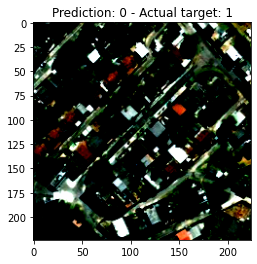

In [8]:
atk = torchattacks.DeepFool(saved_model, steps=50, overshoot=0.02)
adv_example=atk(inputs, labels)[idx]
with torch.no_grad():

    prediction = saved_model(adv_example.unsqueeze(0))

    predicted_class = np.argmax(prediction.cpu())
    print("Class probability: " +str(torch.max(nnf.softmax(prediction, dim=1))))

    # Reshape image

    adv_example=adv_example.cpu()
    adv_example=adv_example.swapaxes(0,1)
    adv_example=adv_example.swapaxes(1,2)

    # Show result
    plt.imshow(adv_example.cpu(), cmap='nipy_spectral')
    plt.title(f'Prediction: {predicted_class} - Actual target: '+str(labels[idx].detach().cpu().numpy()))
    plt.show()

In [1]:
import torch
import torch.nn as nn

import time
import torch


class Attack(object):
    r"""
    Base class for all attacks.

    .. note::
        It automatically set device to the device where given model is.
        It basically changes training mode to eval during attack process.
        To change this, please see `set_training_mode`.
    """
    def __init__(self, name, model):
        r"""
        Initializes internal attack state.

        Arguments:
            name (str): name of attack.
            model (torch.nn.Module): model to attack.
        """

        self.attack = name
        self.model = model
        self.model_name = str(model).split("(")[0]
        self.device = next(model.parameters()).device

        self._attack_mode = 'default'
        self._targeted = False
        self._return_type = 'float'
        self._supported_mode = ['default']

        self._model_training = False
        self._batchnorm_training = False
        self._dropout_training = False

    def forward(self, *input):
        r"""
        It defines the computation performed at every call.
        Should be overridden by all subclasses.
        """
        raise NotImplementedError


    def get_mode(self):
        r"""
        Get attack mode.

        """
        return self._attack_mode


    def set_mode_default(self):
        r"""
        Set attack mode as default mode.

        """
        self._attack_mode = 'default'
        self._targeted = False
        print("Attack mode is changed to 'default.'")


    def set_mode_targeted_by_function(self, target_map_function=None):
        r"""
        Set attack mode as targeted.

        Arguments:
            target_map_function (function): Label mapping function.
                e.g. lambda images, labels:(labels+1)%10.
                None for using input labels as targeted labels. (Default)

        """
        if "targeted" not in self._supported_mode:
            raise ValueError("Targeted mode is not supported.")

        self._attack_mode = 'targeted'
        self._targeted = True
        self._target_map_function = target_map_function
        print("Attack mode is changed to 'targeted.'")


    def set_mode_targeted_least_likely(self, kth_min=1):
        r"""
        Set attack mode as targeted with least likely labels.
        Arguments:
            kth_min (str): label with the k-th smallest probability used as target labels. (Default: 1)

        """
        if "targeted" not in self._supported_mode:
            raise ValueError("Targeted mode is not supported.")

        self._attack_mode = "targeted(least-likely)"
        self._targeted = True
        assert (kth_min > 0)
        self._kth_min = kth_min
        self._target_map_function = self._get_least_likely_label
        print("Attack mode is changed to 'targeted(least-likely).'")


    def set_mode_targeted_random(self):
        r"""
        Set attack mode as targeted with random labels.
        Arguments:
            num_classses (str): number of classes.

        """
        if "targeted" not in self._supported_mode:
            raise ValueError("Targeted mode is not supported.")

        self._attack_mode = "targeted(random)"
        self._targeted = True
        self._target_map_function = self._get_random_target_label
        print("Attack mode is changed to 'targeted(random).'")


    def set_return_type(self, type):
        r"""
        Set the return type of adversarial images: `int` or `float`.

        Arguments:
            type (str): 'float' or 'int'. (Default: 'float')

        .. note::
            If 'int' is used for the return type, the file size of 
            adversarial images can be reduced (about 1/4 for CIFAR10).
            However, if the attack originally outputs float adversarial images
            (e.g. using small step-size than 1/255), it might reduce the attack
            success rate of the attack.

        """
        if type == 'float':
            self._return_type = 'float'
        elif type == 'int':
            self._return_type = 'int'
        else:
            raise ValueError(type + " is not a valid type. [Options: float, int]")


    def set_training_mode(self, model_training=False, batchnorm_training=False, dropout_training=False):
        r"""
        Set training mode during attack process.

        Arguments:
            model_training (bool): True for using training mode for the entire model during attack process.
            batchnorm_training (bool): True for using training mode for batchnorms during attack process.
            dropout_training (bool): True for using training mode for dropouts during attack process.

        .. note::
            For RNN-based models, we cannot calculate gradients with eval mode.
            Thus, it should be changed to the training mode during the attack.
        """
        self._model_training = model_training
        self._batchnorm_training = batchnorm_training
        self._dropout_training = dropout_training


    def save(self, data_loader, save_path=None, verbose=True, return_verbose=False, save_pred=False):
        r"""
        Save adversarial images as torch.tensor from given torch.utils.data.DataLoader.

        Arguments:
            save_path (str): save_path.
            data_loader (torch.utils.data.DataLoader): data loader.
            verbose (bool): True for displaying detailed information. (Default: True)
            return_verbose (bool): True for returning detailed information. (Default: False)
            save_pred (bool): True for saving predicted labels (Default: False)

        """
        if save_path is not None:
            image_list = []
            label_list = []
            if save_pred:
                pre_list = []

        correct = 0
        total = 0
        l2_distance = []

        total_batch = len(data_loader)

        given_training = self.model.training
        given_return_type = self._return_type
        self._return_type = 'float'

        for step, (images, labels) in enumerate(data_loader):
            start = time.time()
            adv_images = self.__call__(images, labels)

            batch_size = len(images)

            if verbose or return_verbose:
                with torch.no_grad():
                    if given_training:
                        self.model.eval()
                    outputs = self.model(adv_images)
                    _, pred = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    right_idx = (pred == labels.to(self.device))
                    correct += right_idx.sum()
                    end = time.time()
                    delta = (adv_images - images.to(self.device)).view(batch_size, -1)
                    l2_distance.append(torch.norm(delta[~right_idx], p=2, dim=1))

                    rob_acc = 100 * float(correct) / total
                    l2 = torch.cat(l2_distance).mean().item()
                    progress = (step+1)/total_batch*100
                    elapsed_time = end-start
                    if verbose:
                        self._save_print(progress, rob_acc, l2, elapsed_time, end='\r')

            if save_path is not None:
                if given_return_type == 'int':
                    adv_images = self._to_uint(adv_images.detach().cpu())
                    image_list.append(adv_images)
                else:
                    image_list.append(adv_images.detach().cpu())
                label_list.append(labels.detach().cpu())

                image_list_cat = torch.cat(image_list, 0)
                label_list_cat = torch.cat(label_list, 0)

                if save_pred:
                    pre_list.append(pred.detach().cpu())
                    pre_list_cat = torch.cat(pre_list, 0)
                    torch.save((image_list_cat, label_list_cat, pre_list_cat), save_path)
                else:
                    torch.save((image_list_cat, label_list_cat), save_path)

        # To avoid erasing the printed information.
        if verbose:
            self._save_print(progress, rob_acc, l2, elapsed_time, end='\n')

        if given_training:
            self.model.train()

        if return_verbose:
            return rob_acc, l2, elapsed_time


    def _save_print(self, progress, rob_acc, l2, elapsed_time, end):
        print('- Save progress: %2.2f %% / Robust accuracy: %2.2f %% / L2: %1.5f (%2.3f it/s) \t' \
              % (progress, rob_acc, l2, elapsed_time), end=end)

    @torch.no_grad()
    def _get_target_label(self, images, labels=None):
        r"""
        Function for changing the attack mode.
        Return input labels.
        """
        if self._targeted:
            given_training = self.model.training
            if given_training:
                self.model.eval()
            target_labels = self._target_map_function(images, labels)
            if given_training:
                self.model.train()
            return target_labels
        else:
            raise ValueError('Please define target_map_function.')

    @torch.no_grad()
    def _get_least_likely_label(self, images, labels=None):
        outputs = self.model(images)
        if labels is None:
            _, labels = torch.max(outputs, dim=1)
        n_classses = outputs.shape[-1]

        target_labels = torch.zeros_like(labels)
        for counter in range(labels.shape[0]):
            l = list(range(n_classses))
            l.remove(labels[counter])
            _, t = torch.kthvalue(outputs[counter][l], self._kth_min)
            target_labels[counter] = l[t]

        return target_labels.long().to(self.device)

    @torch.no_grad()
    def _get_random_target_label(self, images, labels=None):
        outputs = self.model(images)
        if labels is None:
            _, labels = torch.max(outputs, dim=1)
        n_classses = outputs.shape[-1]

        target_labels = torch.zeros_like(labels)
        for counter in range(labels.shape[0]):
            l = list(range(n_classses))
            l.remove(labels[counter])
            t = (len(l)*torch.rand([1])).long().to(self.device)
            target_labels[counter] = l[t]

        return target_labels.long().to(self.device)

    def _to_uint(self, images):
        r"""
        Function for changing the return type.
        Return images as int.
        """
        return (images*255).type(torch.uint8)

    def __str__(self):
        info = self.__dict__.copy()

        del_keys = ['model', 'attack']

        for key in info.keys():
            if key[0] == "_":
                del_keys.append(key)

        for key in del_keys:
            del info[key]

        info['attack_mode'] = self._attack_mode
        info['return_type'] = self._return_type

        return self.attack + "(" + ', '.join('{}={}'.format(key, val) for key, val in info.items()) + ")"

    def __call__(self, *input, **kwargs):
        given_training = self.model.training

        if self._model_training:
            self.model.train()
            for _, m in self.model.named_modules():
                if not self._batchnorm_training:
                    if 'BatchNorm' in m.__class__.__name__:
                        m = m.eval()
                if not self._dropout_training:
                    if 'Dropout' in m.__class__.__name__:
                        m = m.eval()
        else:
            self.model.eval()

        images = self.forward(*input, **kwargs)

        if given_training:
            self.model.train()

        if self._return_type == 'int':
            images = self._to_uint(images)

        return images



class DeepFool(Attack):
    r"""
    'DeepFool: A Simple and Accurate Method to Fool Deep Neural Networks'
    [https://arxiv.org/abs/1511.04599]

    Distance Measure : L2

    Arguments:
        model (nn.Module): model to attack.
        steps (int): number of steps. (Default: 50)
        overshoot (float): parameter for enhancing the noise. (Default: 0.02)

    Shape:
        - images: :math:`(N, C, H, W)` where `N = number of batches`, `C = number of channels`,        `H = height` and `W = width`. It must have a range [0, 1].
        - labels: :math:`(N)` where each value :math:`y_i` is :math:`0 \leq y_i \leq` `number of labels`.
        - output: :math:`(N, C, H, W)`.

    Examples::
        >>> attack = torchattacks.DeepFool(model, steps=50, overshoot=0.02)
        >>> adv_images = attack(images, labels)

    """
    def __init__(self, model, steps=50, overshoot=0.02):
        super().__init__("DeepFool", model)
        self.steps = steps
        self.overshoot = overshoot
        self._supported_mode = ['default']

    def forward(self, images, labels, return_target_labels=False):
        r"""
        Overridden.
        """
        images = images.clone().detach().to(self.device)
        labels = labels.clone().detach().to(self.device)

        batch_size = len(images)
        correct = torch.tensor([True]*batch_size)
        target_labels = labels.clone().detach().to(self.device)
        curr_steps = 0

        adv_images = []
        for idx in range(batch_size):
            image = images[idx:idx+1].clone().detach()
            adv_images.append(image)

        while (True in correct) and (curr_steps < self.steps):
            for idx in range(batch_size):
                if not correct[idx]: continue
                early_stop, pre, adv_image = self._forward_indiv(adv_images[idx], labels[idx])
                adv_images[idx] = adv_image
                target_labels[idx] = pre
                if early_stop:
                    correct[idx] = False
            curr_steps += 1

        adv_images = torch.cat(adv_images).detach()

        if return_target_labels:
            return adv_images, target_labels
        print(images)
        #print("max difference from input image is:" + str(torch.max(torch.abs(adv_images-images))))
        return adv_images


    def _forward_indiv(self, image, label):
        image.requires_grad = True
        fs = self.model(image)[0]
        _, pre = torch.max(fs, dim=0)
        if pre != label:
            return (True, pre, image)

        ws = self._construct_jacobian(fs, image)
        image = image.detach()

        f_0 = fs[label]
        w_0 = ws[label]

        wrong_classes = [i for i in range(len(fs)) if i != label]
        f_k = fs[wrong_classes]
        w_k = ws[wrong_classes]

        f_prime = f_k - f_0
        w_prime = w_k - w_0
        value = torch.abs(f_prime) \
                / torch.norm(nn.Flatten()(w_prime), p=2, dim=1)
        _, hat_L = torch.min(value, 0)

        delta = (torch.abs(f_prime[hat_L])*w_prime[hat_L] \
                 / (torch.norm(w_prime[hat_L], p=2)**2))
       
        
        target_label = hat_L if hat_L < label else hat_L+1

        adv_image = image + (1+self.overshoot)*delta
        
        adv_image = torch.clamp(adv_image, min=0, max=1).detach()
        return (False, target_label, adv_image)

    # https://stackoverflow.com/questions/63096122/pytorch-is-it-possible-to-differentiate-a-matrix
    # torch.autograd.functional.jacobian is only for torch >= 1.5.1
    def _construct_jacobian(self, y, x):
        x_grads = []
        for idx, y_element in enumerate(y):
            if x.grad is not None:
                x.grad.zero_()
            y_element.backward(retain_graph=(False or idx+1 < len(y)))
            x_grads.append(x.grad.clone().detach())
        return torch.stack(x_grads).reshape(*y.shape, *x.shape)


In [2]:
atk = DeepFool(saved_model, steps=50, overshoot=0.0)
adv_example=atk(inputs, labels)[idx]
with torch.no_grad():

    prediction = saved_model(adv_example.unsqueeze(0))

    predicted_class = np.argmax(prediction.cpu())
    print("Class probability: " +str(torch.max(nnf.softmax(prediction, dim=1))))

    # Reshape image

    adv_example=adv_example.cpu()
    adv_example=adv_example.swapaxes(0,1)
    adv_example=adv_example.swapaxes(1,2)

    # Show result
    plt.imshow(adv_example.cpu(), cmap='nipy_spectral')
    plt.title(f'Prediction: {predicted_class} - Actual target: '+str(labels[idx].detach().cpu().numpy()))
    plt.show()

NameError: name 'saved_model' is not defined

Class probability: tensor(1., device='cuda:0')


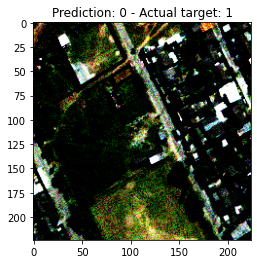

In [9]:
atk = torchattacks.Jitter(saved_model, eps=0.3, alpha=0.00784313725490196, steps=40, scale=10, std=0.1, random_start=True)
adv_example=atk(inputs, labels)[idx]
with torch.no_grad():

    prediction = saved_model(adv_example.unsqueeze(0))

    predicted_class = np.argmax(prediction.cpu())
    print("Class probability: " +str(torch.max(nnf.softmax(prediction, dim=1))))

    # Reshape image

    adv_example=adv_example.cpu()
    adv_example=adv_example.swapaxes(0,1)
    adv_example=adv_example.swapaxes(1,2)

    # Show result
    plt.imshow(adv_example.cpu(), cmap='nipy_spectral')
    plt.title(f'Prediction: {predicted_class} - Actual target: '+str(labels[0].detach().cpu().numpy()))
    plt.show()


Class probability: tensor(1., device='cuda:0')


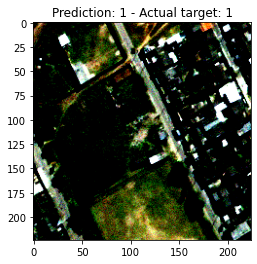

In [10]:
atk = torchattacks.GN(saved_model,std=0.1)
adv_example=atk(inputs, labels)[idx]
with torch.no_grad():

    prediction = saved_model(adv_example.unsqueeze(0))

    predicted_class = np.argmax(prediction.cpu())
    print("Class probability: " +str(torch.max(nnf.softmax(prediction, dim=1))))

    # Reshape image

    adv_example=adv_example.cpu()
    adv_example=adv_example.swapaxes(0,1)
    adv_example=adv_example.swapaxes(1,2)

    # Show result
    plt.imshow(adv_example.cpu(), cmap='nipy_spectral')
    plt.title(f'Prediction: {predicted_class} - Actual target: '+str(labels[0].detach().cpu().numpy()))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Class probability: tensor(1., device='cuda:0')


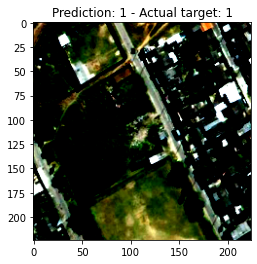

In [11]:
atk = torchattacks.BIM(saved_model)
adv_example=atk(inputs, labels)[idx]
with torch.no_grad():

    prediction = saved_model(adv_example.unsqueeze(0))

    predicted_class = np.argmax(prediction.cpu())
    print("Class probability: " +str(torch.max(nnf.softmax(prediction, dim=1))))

    # Reshape image

    adv_example=adv_example.cpu()
    adv_example=adv_example.swapaxes(0,1)
    adv_example=adv_example.swapaxes(1,2)

    # Show result
    plt.imshow(adv_example.cpu(), cmap='nipy_spectral')
    plt.title(f'Prediction: {predicted_class} - Actual target: '+str(labels[0].detach().cpu().numpy()))
    plt.show()

Class probability: tensor(1., device='cuda:0')


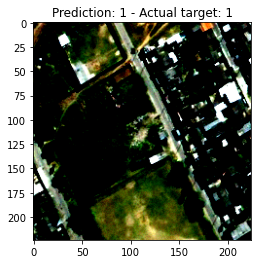

In [12]:
atk = torchattacks.RFGSM(saved_model)
adv_example=atk(inputs, labels)[idx]
with torch.no_grad():

    prediction = saved_model(adv_example.unsqueeze(0))

    predicted_class = np.argmax(prediction.cpu())
    print("Class probability: " +str(torch.max(nnf.softmax(prediction, dim=1))))

    # Reshape image

    adv_example=adv_example.cpu()
    adv_example=adv_example.swapaxes(0,1)
    adv_example=adv_example.swapaxes(1,2)

    # Show result
    plt.imshow(adv_example.cpu(), cmap='nipy_spectral')
    plt.title(f'Prediction: {predicted_class} - Actual target: '+str(labels[0].detach().cpu().numpy()))
    plt.show()

Class probability: tensor(1., device='cuda:0')


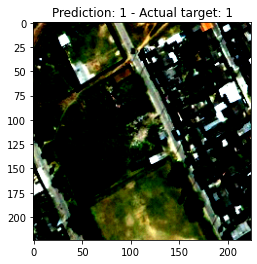

In [13]:
atk = torchattacks.FFGSM(saved_model)
adv_example=atk(inputs, labels)[idx]
with torch.no_grad():

    prediction = saved_model(adv_example.unsqueeze(0))

    predicted_class = np.argmax(prediction.cpu())
    print("Class probability: " +str(torch.max(nnf.softmax(prediction, dim=1))))

    # Reshape image

    adv_example=adv_example.cpu()
    adv_example=adv_example.swapaxes(0,1)
    adv_example=adv_example.swapaxes(1,2)

    # Show result
    plt.imshow(adv_example.cpu(), cmap='nipy_spectral')
    plt.title(f'Prediction: {predicted_class} - Actual target: '+str(labels[0].detach().cpu().numpy()))
    plt.show()

Class probability: tensor(1., device='cuda:0')


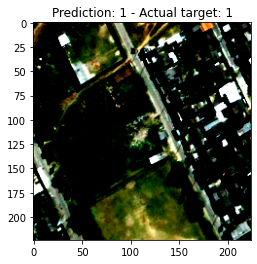

In [14]:
# atk = torchattacks.Pixle(saved_model)
adv_example=atk(inputs, labels)[idx]
with torch.no_grad():

    prediction = saved_model(adv_example.unsqueeze(0))

    predicted_class = np.argmax(prediction.cpu())
    print("Class probability: " +str(torch.max(nnf.softmax(prediction, dim=1))))

    # Reshape image

    adv_example=adv_example.cpu()
    adv_example=adv_example.swapaxes(0,1)
    adv_example=adv_example.swapaxes(1,2)

    # Show result
    plt.imshow(adv_example.cpu(), cmap='nipy_spectral')
    plt.title(f'Prediction: {predicted_class} - Actual target: '+str(labels[0].detach().cpu().numpy()))
    plt.show()

Class probability: tensor(1., device='cuda:0')


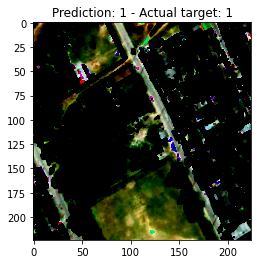

In [15]:
atk = torchattacks.CW(saved_model)
adv_example=atk(inputs, labels)[idx]
with torch.no_grad():

    prediction = saved_model(adv_example.unsqueeze(0))

    predicted_class = np.argmax(prediction.cpu())
    print("Class probability: " +str(torch.max(nnf.softmax(prediction, dim=1))))

    # Reshape image

    adv_example=adv_example.cpu()
    adv_example=adv_example.swapaxes(0,1)
    adv_example=adv_example.swapaxes(1,2)

    # Show result
    plt.imshow(adv_example.cpu(), cmap='nipy_spectral')
    plt.title(f'Prediction: {predicted_class} - Actual target: '+str(labels[0].detach().cpu().numpy()))
    plt.show()